In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#testID = test['Id']
#y_train = train.SalePrice

#all_data = pd.concat([train.drop('SalePrice', axis = 1) , test], keys = ['train','test'])
#all_data.drop(['Id'], axis = 1, inplace = True)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
def num_cat(data_set):
    global numerical_data 
    global categorical_data
    numerical_data = data_set.select_dtypes(include = [np.number])
    categorical_data = data_set.select_dtypes(exclude = [np.number])
    return print ('There are {} numerical features and {} categorical features in the data set'\
      .format(numerical_data.shape[1],categorical_data.shape[1]))
    return numerical_data, categorical_data

In [31]:
num_cat(train)

There are 38 numerical features and 43 categorical features in the data set


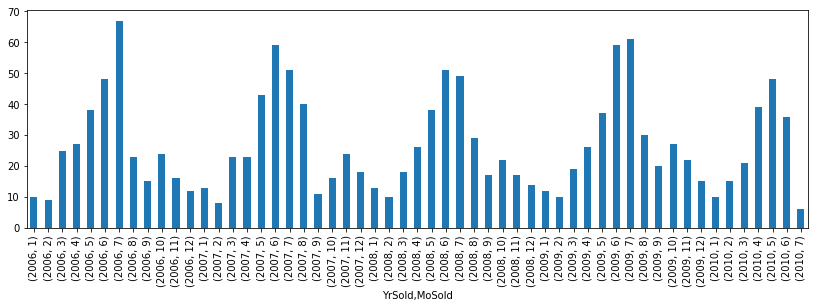

In [8]:
year_month = train.groupby(['YrSold','MoSold']).Id.count()
year_month.plot(kind='bar',figsize= (14,4))

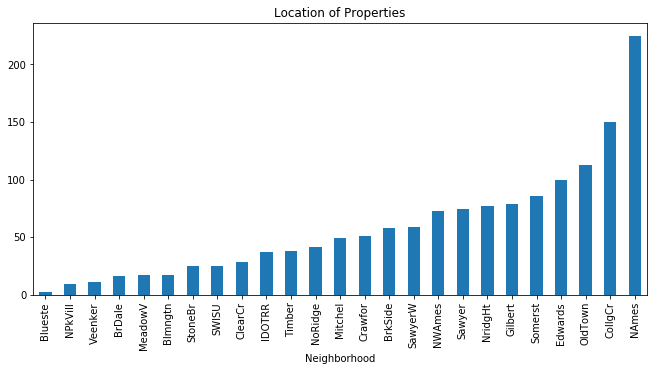

In [9]:
neighborhood = train.groupby('Neighborhood').Id.count().sort_values()
neighborhood.plot(kind='bar',figsize=(11,5))
plt.title("Location of Properties")
plt.show()

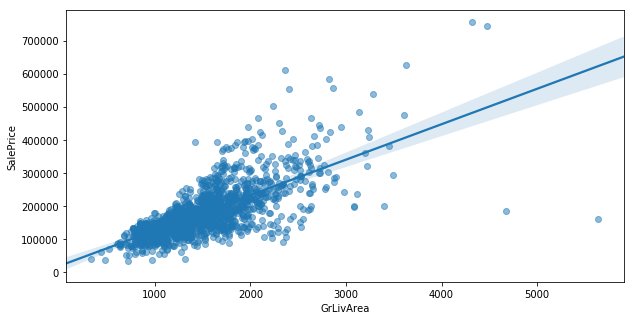

In [10]:
plt.figure(figsize = (10,5))
sns.regplot(train.GrLivArea, train.SalePrice,scatter_kws ={'alpha': 0.5})
plt.show()

In [11]:
train.drop(train[train.GrLivArea >= 4000].index, inplace = True)

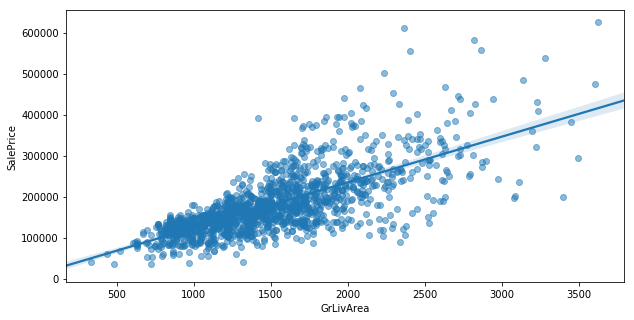

In [12]:
plt.figure(figsize = (10,5))
sns.regplot(train.GrLivArea, train.SalePrice,scatter_kws ={'alpha': 0.5})
plt.show()

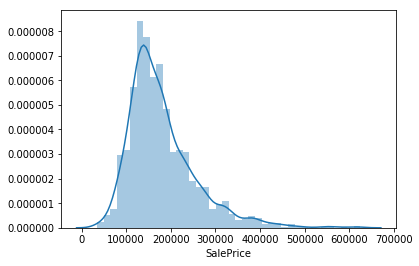

In [13]:
sns.distplot(train['SalePrice'])

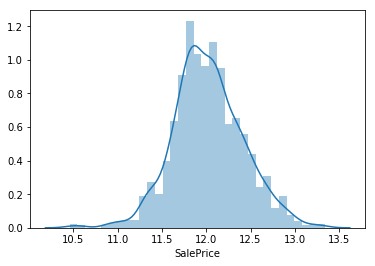

In [14]:
train['SalePrice'] = np.log(train['SalePrice'])
sns.distplot(train['SalePrice'])

In [15]:
testID = test['Id']
y_train = train.SalePrice

all_data = pd.concat([train.drop('SalePrice', axis = 1) , test], keys = ['train','test'])
all_data.drop(['Id'], axis = 1, inplace = True)

In [19]:
num_cat(all_data)

There are 32 numerical features and 47 categorical features in the training data


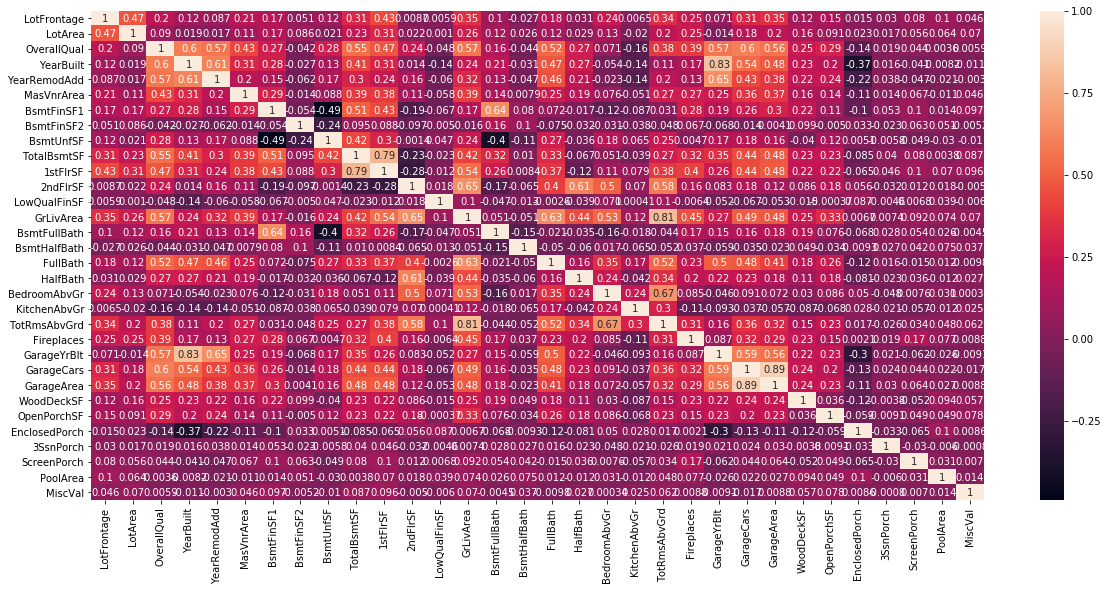

In [20]:
#correlation matrix
#find the correlation between each values
corr= numerical_data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, annot=True);

In [21]:
missing_percent = all_data.isnull().sum() / len(all_data) * 100
missing_percent =  missing_percent[missing_percent > 0]
missing_percent.sort_values(ascending = False)

PoolQC          99.725557
MiscFeature     96.397942
Alley           93.207547
Fence           80.445969
FireplaceQu     48.713551
LotFrontage     16.672384
GarageFinish     5.454545
GarageYrBlt      5.454545
GarageQual       5.454545
GarageCond       5.454545
GarageType       5.385935
BsmtExposure     2.813036
BsmtCond         2.813036
BsmtQual         2.778731
BsmtFinType2     2.744425
BsmtFinType1     2.710120
MasVnrType       0.823328
MasVnrArea       0.789022
MSZoning         0.137221
BsmtFullBath     0.068611
BsmtHalfBath     0.068611
Utilities        0.068611
Functional       0.068611
Exterior2nd      0.034305
Exterior1st      0.034305
SaleType         0.034305
BsmtFinSF1       0.034305
BsmtFinSF2       0.034305
BsmtUnfSF        0.034305
Electrical       0.034305
KitchenQual      0.034305
GarageCars       0.034305
GarageArea       0.034305
TotalBsmtSF      0.034305
dtype: float64

In [22]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [32]:
num_cat(all_data)

There are 32 numerical features and 47 categorical features in the data set


## Fill in missing values

In [33]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [34]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [35]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [36]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [37]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [38]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [39]:
for col in categorical_data.columns:
    all_data[col] = all_data[col].fillna('None')

In [40]:
for col in numerical_data.columns:
    all_data[col] = all_data[col].fillna(0)

In [41]:
all_data = all_data.drop(['Utilities'], axis=1)

In [42]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [43]:
categorical_data.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [45]:
from sklearn.preprocessing import LabelEncoder
#cols is the columns from the categorical_data that have ordering in their values
cols = ['Alley','BsmtCond','BsmtExposure','BsmtFinType1',\
'BsmtFinType2','BsmtQual','ExterCond','ExterQual','FireplaceQu',\
 'Functional','GarageCond', 'GarageFinish','GarageQual', 'HeatingQC',\
 'KitchenQual','PavedDrive','PoolQC','Fence']

for col in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[col].values))
    all_data[col] = lbl.transform(list(all_data[col].values))
num_cat(all_data)

There are 50 numerical features and 28 categorical features in the data set


In [46]:
all_data.shape

(2915, 78)

Since total square feet is important, make three more features for the total squarefeet for the house,floors, and porch

In [47]:
all_data["TotalSF"] = all_data['TotalBsmtSF'] + all_data['GrLivArea']
all_data["TotalFloorSF"] = all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data["TotalPorchSF"] = all_data['OpenPorchSF'] + all_data['EnclosedPorch'] +\
                        all_data['3SsnPorch'] + all_data['ScreenPorch']

In [49]:
num_cat(all_data)

There are 53 numerical features and 28 categorical features in the data set


Find the skewed features of the numerical data

In [50]:
skewed_features =  all_data[numerical_data.columns].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame({'Skew': skewed_features})
skewness.head(10)

,Skew
MiscVal,21.932147
PoolArea,18.701829
LotArea,13.123758
LowQualFinSF,12.080315
3SsnPorch,11.368094
KitchenAbvGr,4.298845
BsmtFinSF2,4.142863
EnclosedPorch,4.000796
ScreenPorch,3.943508
BsmtHalfBath,3.942892


In [51]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    all_data[feat] += 1

There are 53 skewed numerical features to Box Cox transform


# Log on each numerical feature in all_data. To unskew the features
skewness = skewness[abs(skewness) > 0.75]
print('There are {} skewed numerical features'.format(skewness.shape[0]))


for features in skewness.index:
    all_data.loc[:,features] = np.log1p(all_data[features])

### Get dummy categorical features

In [52]:
all_data = pd.get_dummies(all_data)

In [53]:
all_data.shape

(2915, 267)

### Split all_data into a new test and train set

In [54]:
test = all_data.loc['test']
train = all_data.loc['train']

# Modelling

In [55]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [56]:
model_ridge = Ridge()

In [83]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

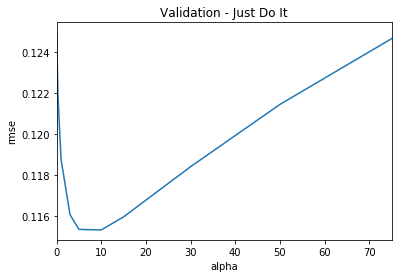

In [84]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [85]:
cv_ridge.min()

0.11532223717912346

In [123]:
model_lasso = LassoCV(alphas = [.005,.01],cv = 5).fit(train, y_train)

In [124]:
rmse_cv(model_lasso).mean()

0.13470950345034932

In [126]:
coef = pd.Series(model_lasso.coef_, index = train.columns)

In [127]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 36 variables and eliminated the other 231 variables


In [128]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

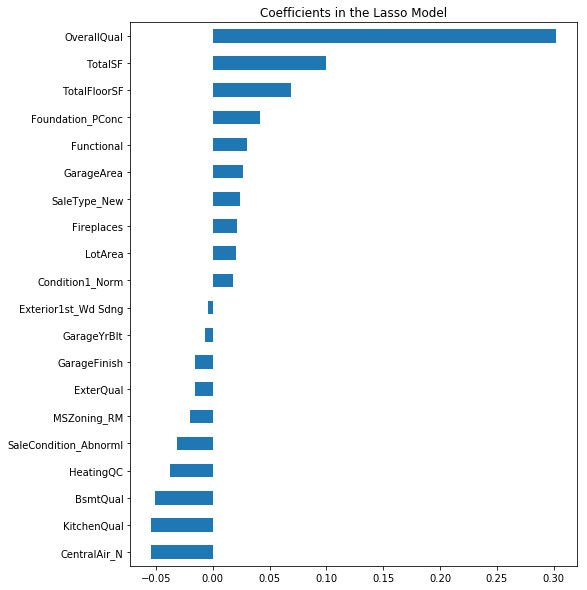

In [130]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

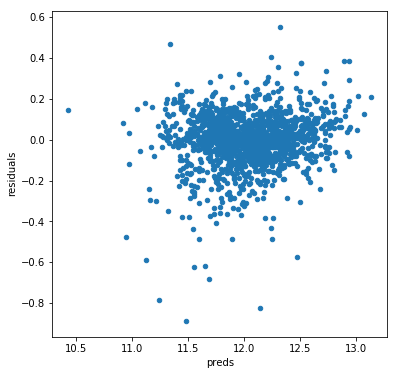

In [132]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [133]:
import xgboost as xgb

In [136]:
dtrain = xgb.DMatrix(train, label = y_train)
dtest = xgb.DMatrix(test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params= params,dtrain = dtrain,  num_boost_round=500, early_stopping_rounds=100)

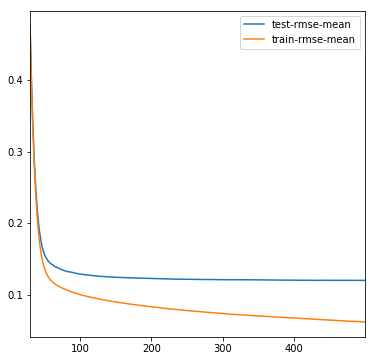

In [137]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [138]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(train, y_train)

[22:51:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [139]:
xgb_preds = np.expm1(model_xgb.predict(test))
lasso_preds = np.expm1(model_lasso.predict(test))

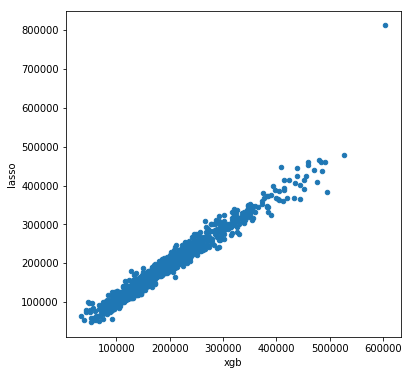

In [140]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [151]:
preds = 0.7*lasso_preds + 0.3*xgb_preds

In [146]:
solution = pd.DataFrame(testID)

In [154]:
solution['SalePrice'] = preds

In [155]:
solution.head()

,Id,SalePrice
0,1461,124938.172754
1,1462,163189.707739
2,1463,188897.134261
3,1464,196584.098847
4,1465,195847.704034


In [156]:
solution.to_csv('ridge_sol.csv', index = False)

In [ ]:
ads

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
# Cross-validation with k-folds
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

For the models use Lasso Regression, Elastic Net Regularizatgion,  
Kernel Ridge Regression, Gradient Boosting, XGBoosting, & LightGBM 

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.01, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.01, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

Use the rsmle_cv function/cross-validation RMSLE error to check performance of models

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

In [ ]:
train.head()